# Section 3: predicting the ground state energy of molecules

In chapter 1 we learned that Tensorflow does all its computations in its graph, that you first have to define. In chapter 2 we made or first neural network, and made a very simple classifier for the iris dataset. 

This chapter we are going to make our neural network more interesting. We are going to [predict the ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

http://web.stanford.edu/class/cs20si/lectures/notes_09.pdf

## Video 1: downloading the data, visualising it 
Welcome to section 3 of our course. In this section we are going to predict the [ground state energies of molecules](https://www.kaggle.com/haimfeld87/prediction-of-ground-state-energies-of-molecules). 

In a [blogpost and paper the author explains what kind of data we are working with](https://burakhimmetoglu.com/machine-learning-meets-quantum-mechanics/). An interesting quote is: 
> This peculiar nonlinear dependence is impossible to model with simple linear models, thus learning algorithms such as neural networks and boosted regression trees are a perfect match for such a task.

Below we will start visualising our data, and you will see that it's difficult for yourself to intuitively predict what the ground energy state of the molecules will be. This makes this dataset a great challenge for us. 
![Vis ground energy state](http://www.pinchofintelligence.com/wp-content/uploads/2017/08/ground-energies.png)



I imagine that the author is also quite happy with us, as he states:
> I am looking for Kagglers to find the best model and reduce mean squared error as much as possible!

Looks like we now know the function we have to minimise. 




## Downloading and loading data
The data is here: https://www.kaggle.com/burakhmmtgl/energy-molecule
Download it, unzip it, and place it in the datasets folder...

Image called downloaddata1.png here...

To load the data I'm going to use a [package called Pandas](http://pandas.pydata.org/). This package is great for reading datasets, and getting an initial understanding of what you are working with. Although we are not doing to discuss all features Pandas has, I just want you to use it one time, and know that it's out there. Pandas is already installed in the Docker image I provided, so let's dive right in: 

In [1]:
import pandas as pd
df = pd.read_csv('datasets/energy-molecule/roboBohr.csv')

In [2]:
# print(df)
print(df.head(5))


   Unnamed: 0          0          1          2          3          4  \
0           0  73.516695  17.817765  12.469551  12.458130  12.454607   
1           1  73.516695  20.649126  18.527789  17.891535  17.887995   
2           2  73.516695  17.830377  12.512263  12.404775  12.394493   
3           3  73.516695  17.875810  17.871259  17.862402  17.850920   
4           4  73.516695  17.883818  17.868256  17.864221  17.818540   

           5          6          7          8    ...      1267  1268  1269  \
0  12.447345  12.433065  12.426926  12.387474    ...       0.0   0.0   0.5   
1  17.871731  17.852586  17.729842  15.864270    ...       0.0   0.0   0.0   
2  12.391564  12.324461  12.238106  10.423249    ...       0.0   0.0   0.0   
3  17.850440  12.558105  12.557645  12.517583    ...       0.0   0.0   0.0   
4  12.508657  12.490519  12.450098  10.597068    ...       0.0   0.0   0.0   

   1270  1271  1272  1273  1274  pubchem_id        Eat  
0   0.0   0.0   0.0   0.0   0.0       250

What we are going to predict is the variable in the last axis, called Eat. To do this we are going to use all features, except for the ID, and the pubchem_id. Let's use pandas to remove these columns: 

In [3]:

df = df.drop(['Unnamed: 0', 'pubchem_id'], axis = 1)


Now we can also check if there is any missing data: 



In [4]:
df.isnull().sum().sum()

0

In [5]:
X = df.drop(['Eat'], axis = 1)
Y = df['Eat']

It's always a good idea to visualise your data. One way to do this is building a scatter plot: 


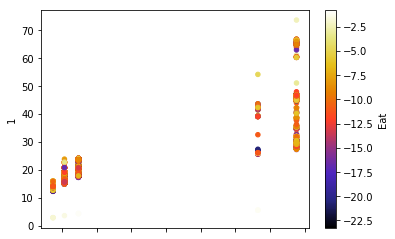

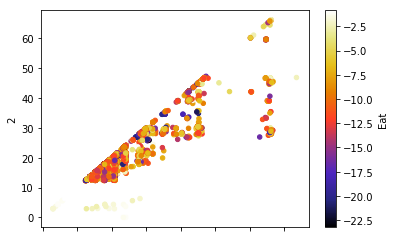

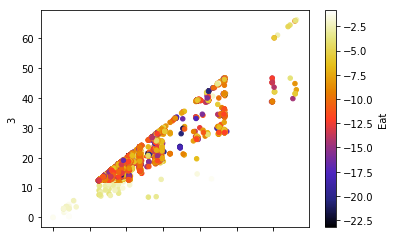

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for x in range(3):
    
    df.plot.scatter(x,x+1,c=-1, colormap=plt.get_cmap('CMRmap'))
    plt.show()
df.plot.scatter?

### Splitting our data
Like we learned in our previous chapter, it's a good idea to split our data. 

In [7]:
from sklearn.model_selection import train_test_split
print(len(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(len(X_train))
print(len(X_test))

datasetX = X_train.values
datasetY = Y_train.values
#print(datasetX.shape)
#print(datasetY.shape)
#print(datasetY)

16242
12993
3249


## Video 2: first approach - easy layer building

Let's start with manually constructing our network again, just like we did in section 1. 

## Simplifying layer building
In chapter 1 we made our network using the following code: 



In [8]:
import tensorflow as tf

n_input = 1275
n_output = 1
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, n_input], name="inputplaceholder")

## This code can be simplified:
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
outputlayer = tf.nn.sigmoid(layer_2)

## Which we can simplify to, but this still is 3 lines...: 
weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))
outputlayer = tf.nn.sigmoid(tf.add(tf.matmul(inputplaceholder, weights), biases))


Still, typing this out for a big neural network is a lot of work, and it's easy to make errors. This is why you can build functions that perform the same thing for you. 

You can also use the higher level functions already available in Tensorflow. You can make the same thing using: 

`tf.layers.dense(inputs=inputplaceholder, units=3, activation=tf.nn.sigmoid, name="single_layer_neural_network") `

Another option you might want to consider is the Keras python package. Keras is a high-level API definition for neural networks. It uses Tensorflow as backend to build its functions on. A neural network even more complex than in chapter two can be made like this: 
![keras logo](https://upload.wikimedia.org/wikipedia/commons/c/c9/Keras_Logo.jpg)
![tensorflow logo](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Tensorflow_logo.svg/1000px-Tensorflow_logo.svg.png)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=3, input_dim=4))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


Using TensorFlow backend.


### Why stick to Tensorflow
It's very likely that for your specific application Keras is good enough (95% sure). However, Tensorflow as been adapting the Keras API specifications, and thus Tensorflow can do roughly the same as Keras. The reason to stick to Tensorflow is that it offers a LOT of extra functionality, which will come in handy for the "strange" applications you want to build. 

Let's create a simple single-layer neural network for our new dataset!

In [10]:
import tensorflow as tf
import numpy as np

In [12]:
LEARNING_RATE = 0.0005
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, units=512, activation=tf.nn.sigmoid, name="first_dense_layer")
network_prediction = tf.layers.dense(inputs=dense, units=1, activation=None, name="prediction_dense_layer")

print(dense)
print(network_prediction)
loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

print(loss)
print("Optimizer: --------")
print(optimizer)


Tensor("first_dense_layer/Sigmoid:0", shape=(?, 512), dtype=float32)
Tensor("prediction_dense_layer/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
Optimizer: --------
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_first_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_first_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/bias/ApplyGradientDescent"



In [13]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

This gives us this network: 
![network](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/two-layer-regression.png)

In [14]:
import random

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
for _ in range(100):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)

78.9002
49.5385
19.3795
22.7197
11.7107
8.85242
12.5596
8.71717
8.609
10.3181


### Adjusting the learning rate
As you can see above our loss becomes HIGHER instead of lower. About once a week I see somebody on Stackoverflow ask why this is happening, and why their network is giving nan as output. The answer is: they have to adjust their learning rate.

![LR](http://www.pinchofintelligence.com/wp-content/uploads/2017/09/Learning-rates.png)

A nice analogy I like to use is one in which we are walking through misty mountains, and want to reach the deepest valley. Every 5 minutes we determine based on our small observation what path leads down, and continue that way. If we did this every second we could never leave small valleys. If we only did this every day we might walk right out of the valley again...

Let's adjust our learning rate tenfold every time till our network is able to learn something. 

In [15]:
LEARNING_RATE = 0.00005
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

In [16]:


zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
loss_history = list()
for _ in range(1000):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)
    loss_history.append(l)

130.584
125.555
120.658
86.2175
68.8379
71.0837
70.5139
67.297
62.1581
33.3976
80.4913
39.1565
38.2472
45.0336
43.1889
38.7456
18.6092
37.8259
36.9052
27.1034
20.4872
27.0548
41.6506
19.2087
14.097
28.7433
25.4089
26.1916
13.3951
40.9417
22.5315
26.4768
21.1278
11.4609
28.044
18.8933
19.5436
13.7173
4.62149
12.727
12.9526
9.59441
9.97562
6.43135
26.5869
12.6823
5.92014
22.3835
11.6332
11.1223
6.36214
14.3737
6.91198
6.48403
15.1966
6.71247
12.8258
9.75218
15.0291
10.9021
8.78124
8.74168
11.0056
13.9978
11.6356
12.1804
11.458
8.55656
11.736
8.91911
6.22638
7.79358
15.3934
12.1335
6.27562
8.89734
9.42827
10.9248
6.49208
6.97639
10.553
11.5398
11.6687
6.28655
12.3746
14.4783
4.72034
13.4506
8.59115
15.7248
11.78
9.95299
15.5227
10.7451
9.08065
11.8238
6.88537
7.93823
6.92774
9.039
9.35221
7.45549
9.26597
14.0333
12.5194
3.95418
5.85163
6.1784
8.59948
9.58371
7.69593
9.59875
3.47326
13.393
5.64882
8.85668
7.97799
6.59026
6.35114
12.2181
6.82592
3.55877
13.4798
8.02405
4.86093
10.5207
6.946

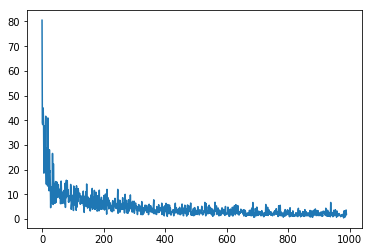

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history[10:])

### Looking at gradients
Knowing about gradients and inspecting them is a vital part of working with neural networks. If your network is stuck, broke, or does not perform as you expect it: take a look at the gradients!

Part of why this is important is that in very deep neural networks we are dealing with vanishing and exploding gradients. Imagine that you start with a high gradient in your final layer, and multiply this with the learning rate. You update your weights and move on to the next layer. Your loss is lower in this layer, and thus your gradient is lower. 


## Video 3: preprocessing data
Last section we made our first multi-layer neural network. This video we are going to learn about standardising data, and why this is important. 

### Train and evaluation functions
To really see the impact of decisions we make when building any machine learning algorithm we need to build some functions that train a network and evaluate a network. I made two simple functions here with the code we made in previous videos so we can demonstrate the effect of preprocessing data!

In [46]:
def reset_and_train_network(sess,inX, 
                            inY, 
                            batch_size, 
                            iterations, 
                            optimizer, 
                            inputplaceholder, 
                            outputplaceholder, 
                            loss_tensor, 
                            verbose=True):
    init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
    sess.run(init)

    zipped = list(zip(inX, inY))


    loss_history = list()
    for _ in range(iterations):
        datax = list()
        datay = list()
        for _ in range(batch_size):
            samp = random.choice(zipped)
            datax.append(samp[0])
            datay.append([samp[1]])
        _, l = sess.run([optimizer,loss_tensor], 
                        feed_dict={inputplaceholder: datax, 
                                   outputplaceholder: datay})
        if verbose:
            print(l)
        loss_history.append(l)
    return loss_history

## Do the train set
def evaluate_network(sess,inX, 
                     inY, 
                     prediction_tensor, 
                     inputplaceholder,
                     outputplaceholder,
                     loss):


    datasetY2 = [[x] for x in inY]
    predicted_values, loss_dataset = sess.run([prediction_tensor,loss], 
                                              feed_dict={inputplaceholder: inX, 
                                                         outputplaceholder: datasetY2})
    print("Loss dataset: " + str(loss_dataset))
    plt.scatter(datasetY2, predicted_values)
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.show()
    



### Why preprocess data
At the moment we are feedign the raw properties of atoms to the network. When we worked with the iris dataset we saw that by shifting all data a bit manually even a single layer neural network was able to classify the data. 

To preprocss the data you can use the [Scikit preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html). With this library you standardise all your data outside of your Tensorflow pipeline. If you want to keep everything inside this pipeline you can use the [tf.Transform library]( https://github.com/tensorflow/transform)



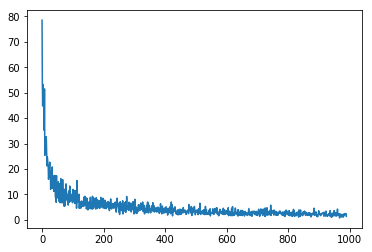

Evaluating network without preprocessing
Loss dataset: 2.17607


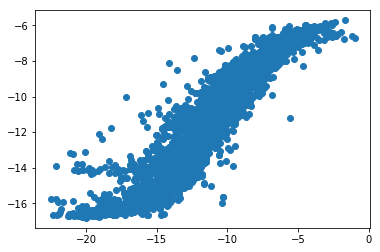

In [19]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
COMPARE_MSE_ITERATIONS = 1000
## Without standardizing our data:
losses = reset_and_train_network(sess,X_train.values,
                                 Y_train.values, 
                                 64, 
                                COMPARE_MSE_ITERATIONS,
                                optimizer, 
                                input_pl, 
                                output_pl,
                                loss,
                                verbose=False)
plt.plot(losses[10:])
plt.show()
print("Evaluating network without preprocessing")
evaluate_network(sess,X_test, Y_test,network_prediction, input_pl, output_pl, loss)



### Determining the mean squared error on a testset
Although our loss function already indicates what the mean squared error on our train set is, this does not help us to compare models after we standardised our input and output data, as the loss naturally will be smaller with smaller numbers. After we "inverted" our predictions back to their normal range we can compare the mean square errors using the sklearn.metrics library! Let's do this now so we can verify the mean squared error function works. 

In [20]:
from sklearn.metrics import mean_squared_error

true_values = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: X_test})
mse = mean_squared_error(predicted_values, true_values)

print("MSE: " + str(mse))

MSE: 2.17607172833


### Scaling our data
To actually scale our data we use the **StandardScaler** of the sklearn library. Calling the `fit(data)` function returns an object that can scale your data. To see how well our neural network performs we scale on the traindata, and evaluate our network on the testdata. 

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

[  1.63512875e-16   1.47653766e-16  -6.30262836e-16 ...,  -1.53122424e-17
  -7.38268832e-18  -1.23044805e-17]
[ 1.  1.  1. ...,  1.  1.  1.]


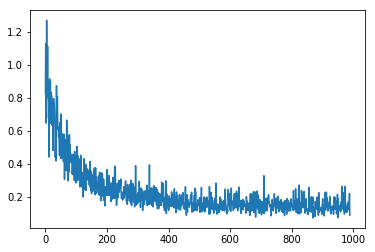

Evaluating trainset with preprocessing
Loss dataset: 0.139199


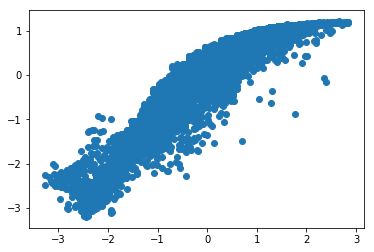

Evaluating testset with preprocessing
Loss dataset: 0.139983


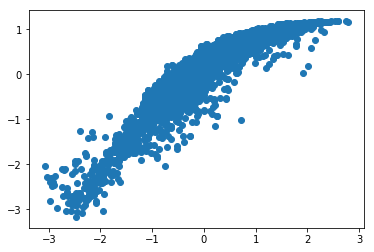

In [21]:
from sklearn import preprocessing

## Create the scalers
scaler = preprocessing.StandardScaler().fit(X_train)
outputscaler = preprocessing.StandardScaler().fit(Y_train)

## Scale all datasets
scaled_trainset = scaler.transform(X_train)
scaled_testset = scaler.transform(X_test)
scaled_train_out = outputscaler.transform(Y_train)
scaled_test_out = outputscaler.transform(Y_test)

## Verify our data is scaled correctly 
print(scaled_trainset.mean(axis=0))
print(scaled_trainset.std(axis=0))


## Retrain the same network with standardized data
losses_norm = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        COMPARE_MSE_ITERATIONS,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)
plt.plot(losses_norm[10:])
plt.show()

## Evaluate the trainset after preprocessing and the testset after preprocessing
print("Evaluating trainset with preprocessing")
evaluate_network(sess,scaled_trainset, scaled_train_out, network_prediction, input_pl, output_pl, loss)
print("Evaluating testset with preprocessing")
evaluate_network(sess,scaled_testset, scaled_test_out, network_prediction, input_pl, output_pl, loss)


In [22]:
from sklearn.metrics import mean_squared_error

## Predict the ground energy of each molecule
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

## Scale these values back, and calculate the MSE
inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)
print("MSE: " + str(mse))

MSE: 1.88622192735


### Visualising your graph
When working with Tensorflow it's easy to make a mistake. For example, when adding an extra layer to your network it's easy to forget to connect it to other layers. A cool feature of our Jupyter notebook is that you can visualise the graph you made. The source of this code can be found in [this Stackoverflow answer](https://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter/38192374#38192374). 


In [23]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [33]:
show_graph(tf.get_default_graph().as_graph_def())


## Video 4: improving the network by understanding the activation function



### Deep neural network
So far we only made a two-layer neural network. You probably heard about "deep neural networks", which means people found out that often by adding more layers in a smart way you can get even better error scores. Let's try to create a four-layer neural network, and see if this improves our error. We start by copying our network and adding layers to it. 

Note one big change: I define a variable for the activation function which we will tweak later!

In [32]:
LEARNING_RATE = 0.0005
ACTIVATION_FUNCTION = activation=tf.nn.sigmoid

tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, units=512, activation=ACTIVATION_FUNCTION, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=256, activation=ACTIVATION_FUNCTION, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=64, activation=ACTIVATION_FUNCTION, name="third_dense_layer")
network_prediction = tf.layers.dense(inputs=dense3, units=1, activation=None, name="prediction_dense_layer")

loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

Tensor("first_dense_layer/Sigmoid:0", shape=(?, 512), dtype=float32)
Tensor("prediction_dense_layer/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
Optimizer: --------
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_first_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_first_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_second_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_second_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_third_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_third_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/bias/ApplyGradientDescent"



name: "init_7"
op: "NoOp"
input: "^first_dense_layer/kernel/Assign"
input: "^first_dense_layer/bias/Assign"
input: "^second_dense_layer/kernel/Assign"
input: "^second_dense_layer/bias/Assign"
input: "^third_dense_layer/kernel/Assign"
input: "^third_dense_layer/bias/Assign"
input: "^prediction_dense_layer/kernel/Assign"
input: "^prediction_dense_layer/bias/Assign"

&&&BLAAT&&


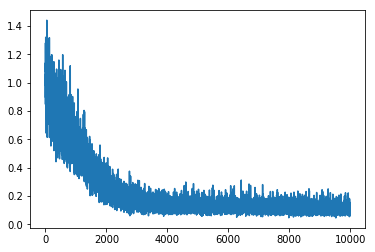

Evaluating trainset with preprocessing
Loss dataset: 0.105986


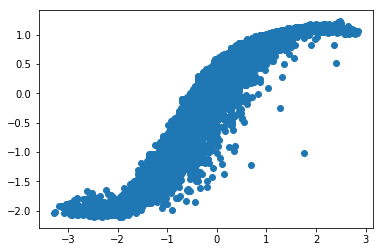

Evaluating testset with preprocessing
Loss dataset: 0.103821


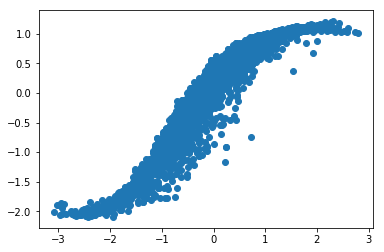

MSE: 1.39895222804


In [45]:

sess = tf.Session()

losses_norm = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        10000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)


plt.plot(losses_norm[10:])
plt.show()

## Evaluate the trainset after preprocessing and the testset after preprocessing
print("Evaluating trainset with preprocessing")
evaluate_network(sess,scaled_trainset, scaled_train_out, network_prediction, input_pl, output_pl, loss)
print("Evaluating testset with preprocessing")
evaluate_network(sess,scaled_testset, scaled_test_out, network_prediction, input_pl, output_pl, loss)


from sklearn.metrics import mean_squared_error

## Predict the ground energy of each molecule
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

## Scale these values back, and calculate the MSE
inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)
print("MSE: " + str(mse))

### Result: lower MSE
As you can see we now have a way lower mean squared error. Now our goal is to minimize this even further. If you look at the dots we plotted with the predicted there is a strange pattern, which I think we can remove by selecting a different activation function. Let's try it: 


In [47]:
LEARNING_RATE = 0.0005
ACTIVATION_FUNCTION = activation=tf.nn.relu

tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")

dense = tf.layers.dense(inputs=input_pl, units=512, activation=ACTIVATION_FUNCTION, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=256, activation=ACTIVATION_FUNCTION, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=64, activation=ACTIVATION_FUNCTION, name="third_dense_layer")
network_prediction = tf.layers.dense(inputs=dense3, units=1, activation=None, name="prediction_dense_layer")

loss = tf.losses.mean_squared_error(output_pl,network_prediction)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

Tensor("first_dense_layer/Relu:0", shape=(?, 512), dtype=float32)
Tensor("prediction_dense_layer/BiasAdd:0", shape=(?, 1), dtype=float32)
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
Optimizer: --------
name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_first_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_first_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_second_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_second_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_third_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_third_dense_layer/bias/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/kernel/ApplyGradientDescent"
input: "^GradientDescent/update_prediction_dense_layer/bias/ApplyGradientDescent"



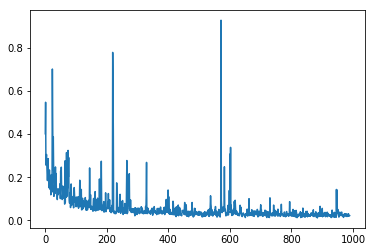

Evaluating trainset with preprocessing
Loss dataset: 0.0228764


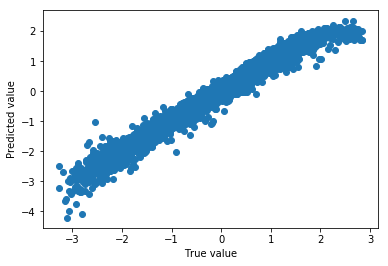

Evaluating testset with preprocessing
Loss dataset: 0.0227784


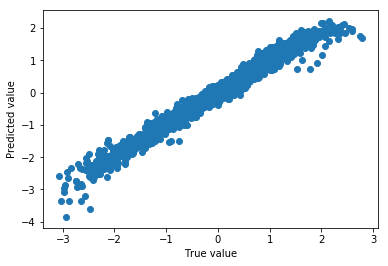

MSE: 0.306930757092


In [53]:
sess = tf.Session()

losses_norm = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        1000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)


plt.plot(losses_norm[10:])
plt.show()

## Evaluate the trainset after preprocessing and the testset after preprocessing
print("Evaluating trainset with preprocessing")
evaluate_network(sess,scaled_trainset, scaled_train_out, network_prediction, input_pl, output_pl, loss)
print("Evaluating testset with preprocessing")
evaluate_network(sess,scaled_testset, scaled_test_out, network_prediction, input_pl, output_pl, loss)


from sklearn.metrics import mean_squared_error

## Predict the ground energy of each molecule
datasetY2 = [[x] for x in Y_test]
predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

## Scale these values back, and calculate the MSE
inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
mse = mean_squared_error(inversed_predicted_values, datasetY2)
print("MSE: " + str(mse))

### Visualising the activation layer
Well, looks like we were really able to make a big improvement this time. Lets visualise what's actually happening in the activation layer:

In [67]:
def visualise_function(function, name):
    ## Create inputs between -5 and 5, and put this in a Tensorflow variable
    inputdata = np.arange(-5.0, 5.0, 0.1)
    mydatainput = tf.Variable(inputdata)
    
    ## Create the output tensor using the supplied function
    functionoutput = function(mydatainput)
    
    ## Create a temporary session for this graph, and evaluate the activation for these datapoints
    with tf.Session() as temp_session:
        init = tf.global_variables_initializer() 
        temp_session.run(init)
        activationdata = functionoutput.eval(session=temp_session)
        
        ## Plot the results
        plt.plot(inputdata,activationdata)
        plt.xlabel("input")
        plt.ylabel("activation")
        plt.title(name)
        plt.show()

        
   

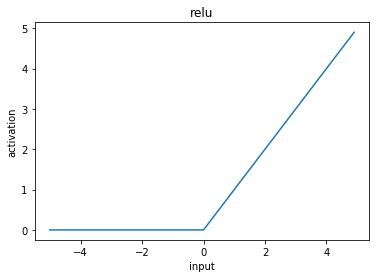

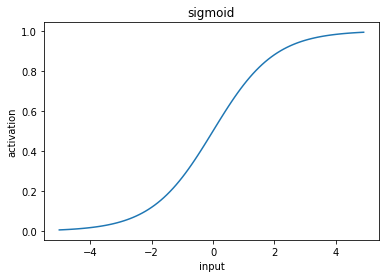

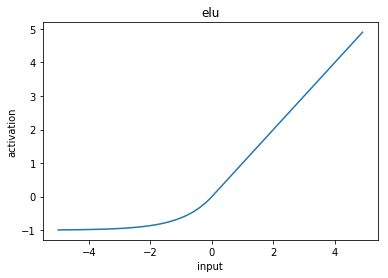

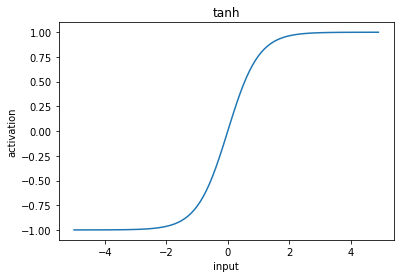

In [68]:
activation_functions = [(tf.nn.relu, "relu"), 
                        (tf.nn.sigmoid, "sigmoid"), 
                        (tf.nn.tanh, "tanh"),
                       (tf.nn.elu, "elu")]

for func, name in activation_functions:
    visualise_function(func, name)
        


## Video 5: the importance of hyper parameters
So far when defining our neural network we kind of guessed the "hyper parameters". Hyper parameters describe our network, but they are not part of the actual network. Note that they are able to have a big influence on your network: selecting the right learning rate, the right amount of layers, and the sizes of your layers are very important, and can contribute a lot to your final performance. 

In this section we will try to find the best performance for the network we made in the last video. In this case we optimize one hyper parameter: the learning rate. 

In [87]:

## Define the network: the same as the network in the previous section. 
ACTIVATION_FUNCTION = activation=tf.nn.relu
tf.reset_default_graph()
input_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1275], name="inputplaceholder")
output_pl = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="userdefinedoutput")
dense = tf.layers.dense(inputs=input_pl, units=512, activation=ACTIVATION_FUNCTION, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense, units=256, activation=ACTIVATION_FUNCTION, name="second_dense_layer")
dense3 = tf.layers.dense(inputs=dense2, units=64, activation=ACTIVATION_FUNCTION, name="third_dense_layer")
network_prediction = tf.layers.dense(inputs=dense3, units=1, activation=None, name="prediction_dense_layer")
loss = tf.losses.mean_squared_error(output_pl,network_prediction)

mses = list()
losses = list()
#for learning_rate in np.arange(0.0001, 0.05, 0.0002):
learning_rates = np.arange(0.0001, 0.001, 0.0002)
for learning_rate in learning_rates:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    sess = tf.Session()
    losses_norm = reset_and_train_network(sess,scaled_trainset,
                                      scaled_train_out,
                                      64, 
                                        1000,
                                        optimizer, 
                                        input_pl, 
                                        output_pl,
                                        loss,
                                        verbose=False)
    datasetY2 = [[x] for x in Y_test]
    predicted_values = sess.run(network_prediction, feed_dict={input_pl: scaled_testset})

    ## Scale these values back, and calculate the MSE
    inversed_predicted_values = outputscaler.inverse_transform(predicted_values)
    losses.append(losses_norm[-1])

    mse = mean_squared_error(inversed_predicted_values, datasetY2)
    mses.append(mse)

    print("Loss at learning rate: " + str(learning_rate) + " loss: " + str(losses_norm[-1]) + " mse: " + str(mse))


Loss at learning rate: 0.0001 loss: 0.0535809 mse: 0.765865204917
Loss at learning rate: 0.0003 loss: 0.0422183 mse: 0.419181209176
Loss at learning rate: 0.0005 loss: 0.0212089 mse: 0.317553657491
Loss at learning rate: 0.0007 loss: 0.00811248 mse: 0.303679070667
Loss at learning rate: 0.0009 loss: 0.0103785 mse: 0.226300415237


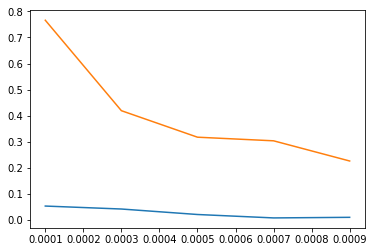

In [88]:
plt.plot(learning_rates,losses)
plt.plot(learning_rates,mses)



### More on hyper parameters

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

zipped = list(zip(datasetX, datasetY))

BATCH_SIZE = 32
loss_history = list()
for _ in range(10000):
    datax = list()
    datay = list()
    for _ in range(BATCH_SIZE):
        samp = random.choice(zipped)
        datax.append(samp[0])
        datay.append([samp[1]])
    _, l = sess.run([optimizer,loss], feed_dict={input_pl: datax, output_pl: datay})
    print(l)
    loss_history.append(l)

In [ ]:
plt.plot(losses[-100:])
plt.plot(losses_norm[-100:])


### Annealing the learning rate
Right now we keep the learning rate the same the whole time. It's generally a good idea to reduce your learning rate slowly during training. There are several options for this with Tensorflow: 
- Define a placeholder for the learning rate and pass this to the network as parameter
- Use the `tf.train.exponential_decay` function. 
We are going use the second approach!


In [ ]:
tf.train.exponential_decay?

> 
When training a model, it is often recommended to lower the learning rate as
the training progresses.  This function applies an exponential decay function
to a provided initial learning rate.  It requires a `global_step` value to
compute the decayed learning rate.  You can just pass a TensorFlow variable
that you increment at each training step.

In [ ]:
LEARNING_RATE = 0.00005
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = LEARNING_RATE
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           10000, 0.96, staircase=True)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### Revisiting train, test, and the validation set
During our search for the best hyper parameters we did something terrible: by optimising our network on our test data, and taking the best parameters for our test data, we "leaked knowledge" about our test set into our algorithms. 

Right now I'm not going to fix this, but you have to be aware of this "smell" in your own train data... it probably affects your results when you take new data. 

In [ ]:
filename_queue = tf.train.string_input_producer(["datasets/celebrities/list_attr_celeba.txt"])
textlinereader = tf.TextLineReader(skip_header_lines=2) #https://www.tensorflow.org/api_docs/python/tf/TextLineReader
key, val = textlinereader.read(filename_queue)
sess = tf.Session()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

#record_defaults = [["000001.jpg"] + [0]*40]
record_defaults = [[0] for _ in range(40)]
content = tf.decode_csv(val, record_defaults=record_defaults)


# Evaluate the tensor `c`.
print(sess.run([key,val]))
print(sess.run([key,val]))
print(sess.run([key,val]))
print(sess.run([key,val]))
#print(sess.run([content]))

# https://www.tensorflow.org/programmers_guide/reading_data

In [ ]:

tf.decode_csv?
    

In [ ]:
print(zipped)


In [ ]:
col1, col2, col3, col4, col5 = tf.decode_csv(
    value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4])

with tf.Session() as sess:
  # Start populating the filename queue.
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1200):
    # Retrieve a single instance:
    example, label = sess.run([features, col5])

  coord.request_stop()
  coord.join(threads)


In [ ]:
estimator = tf.estimatorDNNRegressor(
    feature_columns=[sparse_feature_a_emb, sparse_feature_b_emb],
    hidden_units=[1024, 512, 256])


In [ ]:
tf.estimator.DNNRegressor(feature_columns=[sparse_feature_a_emb, sparse_feature_b_emb],
    hidden_units=[1024, 512, 256]))

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cool Keras thing

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=1275, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=4, batch_size=5, verbose=1)
seed=10
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, datasetX, datasetY, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(datasetX, datasetY)
prediction = estimator.predict(datasetXtest)
plt.scatter(datasetYtest,prediction)

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



Although some of the clouds overlap you can see that we are probably able to classify any new species based on these three properties of the flowers. 






If you have your own dataset with values that look similar to those of the Iris dataset, give the network you just made a go! If the network does not converge yet, there are many tips and tricks you have to know about neural networks that you need to learn, and will learn during this course. 


In [ ]:
import sklearn

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris['feature_names'])
print(len(iris['data']))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Cool snail-age tutorial: https://www.tensorflow.org/versions/r0.12/tutorials/estimators/

## A single layer network
This is where we show 

$Y = \sum{weight*input} + bias$

This means that for one neuron we multiply the input with the weight, do this for each input-weight combination, and then add a bias. 



## What activation functions are out there?

Story about how deep learning advances the last couple of years are party due to new activation functions: RELU and ELU. 

By only multiplying you get a 'linear' seperation. Why/how? 

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

That's why it's common to add a 'nonregularity' after each layer. This turns the linear activation into a nonlinear activation. 

[Available activation functions](https://www.tensorflow.org/api_guides/python/nn#Activation_Functions)
Let's take a look at the nonregularities Tensorflow offers out of the box with some sample graphs:


In [ ]:
inputdata = np.arange(-5.0, 5.0, 0.1)
SHAPE_INPUT = inputdata.shape
print(SHAPE_INPUT)

In [ ]:
mydatainput = tf.placeholder(dtype=tf.float32, shape=SHAPE_INPUT)
reluoutput = tf.nn.relu(mydatainput) # https://www.tensorflow.org/api_docs/python/tf/nn/relu

relu6output = tf.nn.relu6(mydatainput)
creluoutput = tf.nn.crelu(mydatainput) # Concatenated relu
eluoutput = tf.nn.elu(mydatainput)
sigmoidoutput = tf.sigmoid(mydatainput)
tanhoutput = tf.tanh(mydatainput)

# tf.nn.softplus
# tf.nn.softsign
# tf.nn.dropout
# tf.nn.bias_add

print(reluoutput)

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)


In [ ]:
a,b,c,d,e = sess.run([reluoutput, creluoutput, eluoutput, sigmoidoutput, tanhoutput], feed_dict={mydatainput:inputdata})
print(a)
for x in [a,b,c,d,e]:
    print(len(x))

In [ ]:
plt.plot(a)



plt.plot(c)

plt.plot(d)

plt.plot(e)
plt.legend(['relu', 'elu', 'sigmoid', 'tanh'], loc='upper left')

plt.show()

You might think: what do I have to do with all this information, how do I use it, what activation function is best? The take-home message here is that you should know what they exist, how each one of them looks in the plot above. 


## Softmax
In classificiation it's a good idea to use softmax. 

Right now each output neuron gives us a 'score'. The neuron with the highest score tells us what flower we are probably dealing with. 
But what about those difficult flowers that look like each other? We would love to have a probability per class. This is why we use the softmax layer. 

What this layer does is taking all activations and summing them: 
XXXX
Then it divides each activation through the total sum. 


